 # ✤ Focus on Data Preprocessing and filling missing values

### Task:
Make a preprocessing with your own dataset and answer the following questions: 
+ 1.	"what (intro) ,  (describe and show original dataset)
+ 2.	why ( methods ) ,
+ 3.	 how ( by builtt-in functions or manually) "   
+ 4.	include Missingness!!! type and  how you deal with it

+ the comparison resullts of  the models  ( regression /classification / clustering) with preprocessing ( at least 2 different method)  and without missing pattern.


# ✤ Analysis of Worldwide Suicide Rates
### ✤ Introduction

&emsp; According to this dataset of Global Suicide Rates , people of different ages have committed suicides because of pressure, barriers, or a lack of mental healthcare across all countries. In addition, in this analysis I am going to compare the prediction of the  suicides number depending on different age groups, genders, generations, countries, and ratio of suicides per 100k population over period of 1985 and 2015 years.

&emsp;  Suicide takes place throughout the life and it has been one of the leading causes of death in many countries. Unfortunately, each suicide is a tragic loss of human's life that has own consequences on people left apart, like family and friends.

 &emsp;  The goal of the Global Suicide Rates analysis is to demonstrate statistics of 27 820 observations, which grouped by certain age ranges, gender(male/female), number of suicides, population of country, GDP (gross domestic product) per year and person, HDI (human development index) different generations during the period of 1985 & 2015 across the world. In addition, we will find which factors had more influence on the number of suicides in 101 countries.


My analysis will be based on dataset during the 30 years, because I found this great dataset on Kaggle website=> 
+ https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

## 2. Data description

+  Country –  geographical location on a map.
+  Year – the time when suicide happened.
+  Sex – gender as Male/Female.
+  Age – age of individuals who committed suicide.
+  Suicides_no – number of suicides.
+  Population – people living in a particular country.
+  Ratio(suicides_no/pop) – # of suicides per country's population.
+  HDI for year – human development index in each year.
+  GDP_per year – gross domestic value in each year.
+  GDP_per_capita – gross domestic value for each person. 
+  Generation – name of different age groups.

In [ ]:
#Importing 'must-have' Libraries like these:

import numpy as np  # to access data in any formats.
import pandas as pd  # to work with data frame formats.
import warnings  # do not show matching warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#observing my dataset from 'suicide' csv file:
data = pd.read_excel('suicide-excel.xls')

In [ ]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [ ]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '').str.replace('(', '').str.replace(')', '').str.replace('$', '')

In [ ]:
#by using rename() function:
data.rename(columns={'sex':'gender'},inplace=True)

In [ ]:
data

,country,year,gender,age,suicides_no,population,suicides/100kpop,country-year,hdiforyear,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,NaN,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,NaN,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,NaN,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,NaN,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,NaN,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,NaN,2309,Generation Z


**✤  From results of dataset, I can count total number of rows & columns, with shape function :**

In [ ]:
print(data.shape)

(27820, 12)


In [ ]:
columns = ['year', 'age', 'generation']
for col in columns:
    print("\n {}'s - Unique values : \n {}".format(col, data[col].unique()))


 year's - Unique values : 
 [1987 1988 1989 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 1985 1986 1990 1991 2012 2013
 2014 2015 2011 2016]

 age's - Unique values : 
 ['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']

 generation's - Unique values : 
 ['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']


In [ ]:
print('Amount of different types of countries: ')
print(len(data['country'].unique())) 
#count them

distinct_countries = data['country'].unique()
print(distinct_countries) 
#show all of them

Amount of different types of countries: 
101
['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelle

#  ✤  Data preparation: cleaning and shaping

✤ In this dataset,as you noticed from last 5 rows in table,there is no rows with data in 2016 year, because it is incomplete for some countries. So,I want to delete data related to this year (2016):

In [ ]:
data = data[data['year'] != 2016]
# removing specific values in a dataframe

In [ ]:
data.shape

(27660, 12)

In [ ]:
# deleting unneeded columns:
#data.drop(['country-year'], inplace=True)
data.drop('country-year', axis=1, inplace=True)

**✤ As you can see from initial 5 rows of table, there are null values(NaN) in HDI and Gdp_for_year column, and we should guess all other missing values from table:**

In [ ]:
# by using isnull() function and we count empty values in columns:
data.isnull().sum()

country                 0
year                    0
gender                  0
age                     0
suicides_no             0
population              0
suicides/100kpop        0
hdiforyear          19296
gdp_for_year         1074
gdp_per_capita          0
generation              0
dtype: int64

**✤  'HDI_for_year' column has missing rows- 19296 out of 27820 rows, it is about 65-70% of observations missed, it means without any data.**
### ✤  PERCENTAGE OF MISSINGNESS:

In [ ]:
null_values = data.isnull().mean()*100
null_values

country              0.000000
year                 0.000000
gender               0.000000
age                  0.000000
suicides_no          0.000000
population           0.000000
suicides/100kpop     0.000000
hdiforyear          69.761388
gdp_for_year         3.882863
gdp_per_capita       0.000000
generation           0.000000
dtype: float64

## ✤ Nullity BAR, by Importing new libarary => "missingno"

In [ ]:
import missingno as msno

<AxesSubplot:>

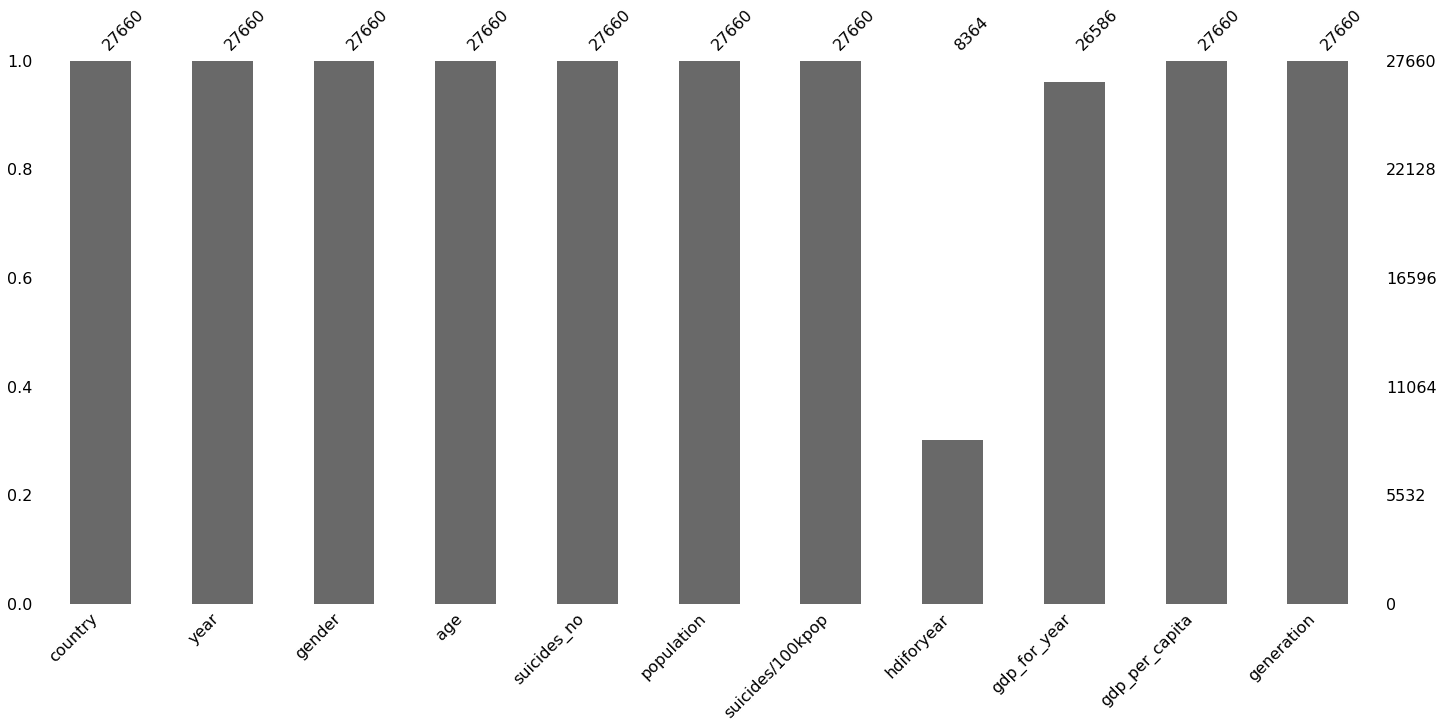

In [ ]:
msno.bar(data)

## ✤ Nullity Matrix

<AxesSubplot:>

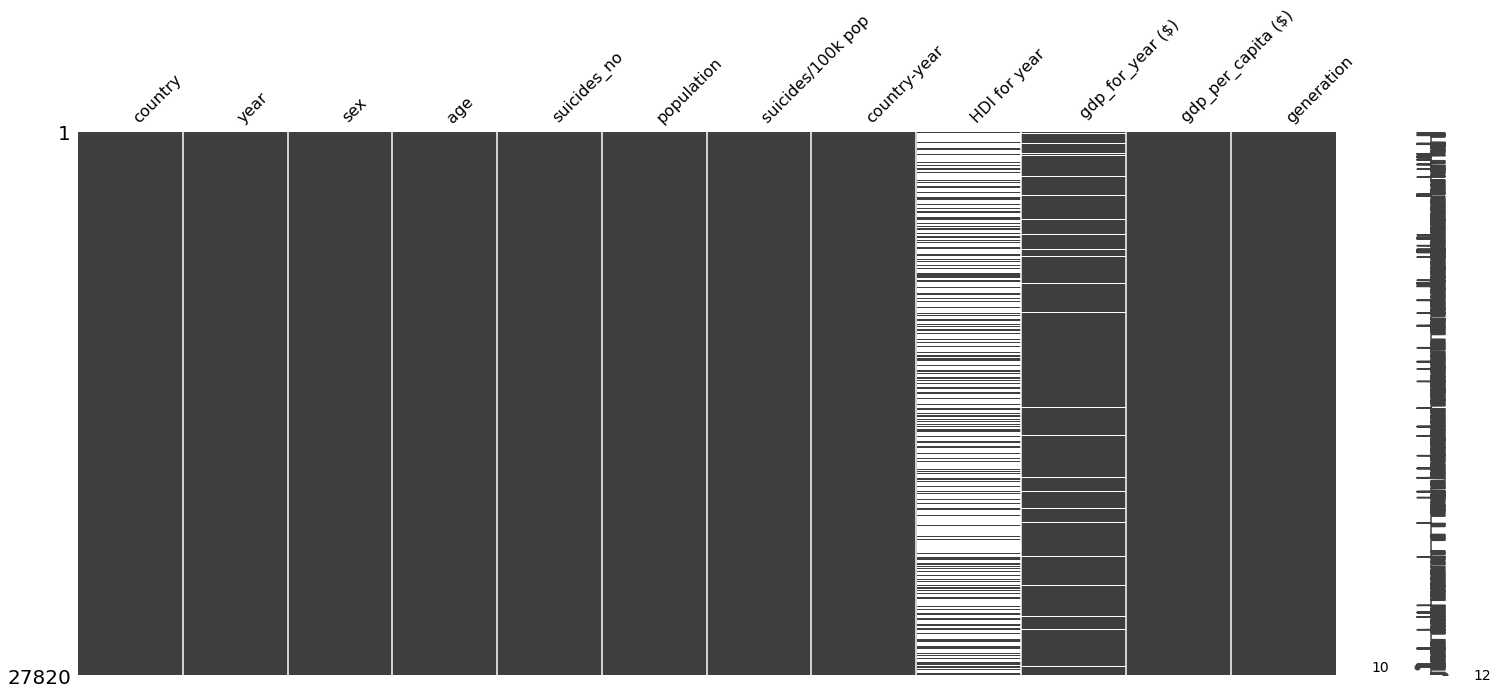

In [ ]:
msno.matrix(data)

In [ ]:
# Missingness Dendrogram
# msno.dendrogram(data)

**I checked my dataset in  file, and here I understand that:**
+ In **"HDI column"** is Missing at Random(MAR) => **Method of Filling is "Mean Imputation"**

In [ ]:
data['hdiforyear'].mean()

0.7766011477761785

In [ ]:
# importing new library to fill with mean:
from sklearn.impute import SimpleImputer

# Missing values is represented using NaN: 
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean') 
data.hdiforyear = imputer.fit_transform(data['hdiforyear'].values.reshape(-1,1))

In [ ]:
# Another Method of filling:

# data['hdiforyear'] = data['hdiforyear'].fillna((data['hdiforyear'].mean()))

**I checked my dataset in Excel file, and here I understand that:**
+ There was null values, between first and last row for each country, like between range was empty, but somwhere it was full.
+ In  **"GDP_for year"** column is Missing not at Random(MNAR) => **Method of Filling is "Forward and Backward Filling"**

In [ ]:
data['gdp_for_year'] = data['gdp_for_year'].fillna(method='ffill').fillna(method='bfill')

✤ **Now I can check and see, that there are no NULL values:**

In [ ]:
# again by using isnull() function and we count empty values in columns:
data.isnull().any()
# So, bollean "false" means that there is no null data:

country             False
year                False
gender              False
age                 False
suicides_no         False
population          False
suicides/100kpop    False
hdiforyear          False
gdp_for_year        False
gdp_per_capita      False
generation          False
dtype: bool

**✤  Additionally, we should know datatypes of our variables, it will help us in analysis:**
 + object-> categorical data
 + int64 -> numerical data 
 + float64-> numerical data 

In [ ]:
data.dtypes

country              object
year                  int64
gender               object
age                  object
suicides_no           int64
population            int64
suicides/100kpop    float64
hdiforyear          float64
gdp_for_year         object
gdp_per_capita        int64
generation           object
dtype: object

## ✤  Preparing a variables for 'Age- ranges':

In [ ]:
data['age'] = data['age'].str.replace('years','')

In [ ]:
data['age'].unique()

array(['15-24 ', '35-54 ', '75+ ', '25-34 ', '55-74 ', '5-14 '],
      dtype=object)

In [ ]:
data['age'] = data['age'].replace('5-14 ',1).replace('15-24 ',2).replace('25-34 ',3).replace('35-54 ',4).replace('55-74 ',5).replace('75+ ',6)

In [ ]:
data.head()

,country,year,gender,age,suicides_no,population,suicides/100kpop,hdiforyear,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,2,21,312900,6.71,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,4,16,308000,5.19,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,2,14,289700,4.83,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,6,1,21800,4.59,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,3,9,274300,3.28,0.776601,"2,156,624,900",796,Boomers


## ✤  Encoding and Preparing catrgorical variables like 'Gender' and 'Generation':
+ **In such way that [ Male is 1 and Female is 0]**
+ **In such way that Each 6 genearation from 1 to 6.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# importing NEW library to encode:

label = LabelEncoder()
data['gender'] = label.fit_transform(data['gender'])
data['generation'] = label.fit_transform(data['generation'])

In [ ]:
data.head()

,country,year,gender,age,suicides_no,population,suicides/100kpop,hdiforyear,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,1,2,21,312900,6.71,0.776601,"2,156,624,900",796,2
1,Albania,1987,1,4,16,308000,5.19,0.776601,"2,156,624,900",796,5
2,Albania,1987,0,2,14,289700,4.83,0.776601,"2,156,624,900",796,2
3,Albania,1987,1,6,1,21800,4.59,0.776601,"2,156,624,900",796,1
4,Albania,1987,1,3,9,274300,3.28,0.776601,"2,156,624,900",796,0


### ✤ Preparing a variables for 'Gdp_for_Year' 

In [ ]:
# deleting commas from string:
data['gdp_for_year'] = data['gdp_for_year'].apply(lambda val: val.replace(',', ''))
# converting into numberS:
data['gdp_for_year'] = pd.to_numeric(data['gdp_for_year'])

**✤ I decided to drop categorical column=> Country, because I have 100 countries,so much and also ratio column:**

In [ ]:
data.drop('country', axis=1, inplace=True)

In [ ]:
data.drop('suicides/100kpop', axis=1, inplace=True)

In [ ]:
data.shape

(27660, 9)

In [ ]:
# HERE IS MY FINAL DATASET:
data

,year,gender,age,suicides_no,population,hdiforyear,gdp_for_year,gdp_per_capita,generation
0,1987,1,2,21,312900,0.776601,2156624900,796,2
1,1987,1,4,16,308000,0.776601,2156624900,796,5
2,1987,0,2,14,289700,0.776601,2156624900,796,2
3,1987,1,6,1,21800,0.776601,2156624900,796,1
4,1987,1,3,9,274300,0.776601,2156624900,796,0
...,...,...,...,...,...,...,...,...,...
27815,2014,0,4,107,3620833,0.675000,63067077179,2309,2
27816,2014,0,6,9,348465,0.675000,63067077179,2309,5
27817,2014,1,1,60,2762158,0.675000,63067077179,2309,3
27818,2014,0,1,44,2631600,0.675000,63067077179,2309,3


In [ ]:
# ALL DATATYPES ARE INTEGERS:
data.dtypes

year                int64
gender              int32
age                 int64
suicides_no         int64
population          int64
hdiforyear        float64
gdp_for_year        int64
gdp_per_capita      int64
generation          int32
dtype: object

### ✤ SAVING MY NEW dataset into excel file:

In [ ]:
data.to_excel("NEW-suicide.xlsx")

In [ ]:
new_data = pd.read_excel('NEW-suicide.xlsx')

**✤  Also, there is a Statistical description of my dataset, it illustrates a fairly wide range of data such as total amount, average mean value, standard deviation, interqurtile range and min/max values:**

In [ ]:
new_data.describe()

,year,gender,age,suicides_no,population,hdiforyear,gdp_for_year,gdp_per_capita,generation
count,27660.000000,27660.000000,27660.000000,27660.000000,2.766000e+04,27660.000000,2.766000e+04,27660.000000,27660.000000
mean,2001.173102,0.500000,3.500000,243.413485,1.850689e+06,0.776601,4.471010e+11,16815.568330,2.700145
std,8.418754,0.500009,1.707856,904.490185,3.920658e+06,0.051340,1.457574e+12,18861.585497,1.809814
min,1985.000000,0.000000,1.000000,0.000000,2.780000e+02,0.483000,4.691962e+07,251.000000,0.000000
25%,1994.000000,0.000000,2.000000,3.000000,9.753525e+04,0.776601,8.976208e+09,3436.000000,1.000000
50%,2002.000000,0.500000,3.500000,25.000000,4.307250e+05,0.776601,4.801361e+10,9283.000000,2.000000
75%,2008.000000,1.000000,5.000000,132.000000,1.491041e+06,0.776601,2.602024e+11,24796.000000,4.000000
max,2015.000000,1.000000,6.000000,22338.000000,4.380521e+07,0.944000,1.812071e+13,126352.000000,5.000000


#  ✤  Data Preprocessing

##  ✤ Normalisation of Whole dataset (without missing values): ✤

In [ ]:
from sklearn.preprocessing import Normalizer
#importing Normalisation Library.

scaler = Normalizer().fit(new_data)
normalizeData = scaler.transform(new_data)
normalizeData = pd.DataFrame(normalizeData, index = new_data.index, columns = new_data.columns)
normalizeData

,year,gender,age,suicides_no,population,hdiforyear,gdp_for_year,gdp_per_capita,generation
0,9.213470e-07,4.636875e-10,9.273750e-10,9.737437e-09,0.000145,3.601002e-10,1.0,3.690952e-07,9.273750e-10
1,9.213470e-07,4.636875e-10,1.854750e-09,7.419000e-09,0.000143,3.601002e-10,1.0,3.690952e-07,2.318437e-09
2,9.213470e-07,0.000000e+00,9.273750e-10,6.491625e-09,0.000134,3.601002e-10,1.0,3.690952e-07,9.273750e-10
3,9.213471e-07,4.636875e-10,2.782125e-09,4.636875e-10,0.000010,3.601002e-10,1.0,3.690952e-07,4.636875e-10
4,9.213470e-07,4.636875e-10,1.391062e-09,4.173187e-09,0.000127,3.601002e-10,1.0,3.690952e-07,0.000000e+00
...,...,...,...,...,...,...,...,...,...
27655,3.193425e-08,0.000000e+00,6.342453e-11,1.696606e-09,0.000057,1.070289e-11,1.0,3.661181e-08,3.171227e-11
27656,3.193425e-08,0.000000e+00,9.513680e-11,1.427052e-10,0.000006,1.070289e-11,1.0,3.661181e-08,7.928067e-11
27657,3.193425e-08,1.585613e-11,1.585613e-11,9.513680e-10,0.000044,1.070289e-11,1.0,3.661181e-08,4.756840e-11
27658,3.193425e-08,0.000000e+00,1.585613e-11,6.976699e-10,0.000042,1.070289e-11,1.0,3.661181e-08,4.756840e-11


### ✤  Standardisation of Whole dataset: ✤


In [ ]:
# from sklearn.preprocessing import StandardScaler
#importing Standardisation Library.

# scaler = StandardScaler().fit(new_data)
# standardizedData = scaler.transform(new_data)
# standardizedData = pd.DataFrame(standardizedData, index = new_data.index, columns = new_data.columns)
# standardizedData

## ✤ Train and Test Split - Ratio 80 / 20
+ Now let's split the data into a training set and a testing set. We'll train out model on the training set and then use the test set to evaluate the model. To do that, we need to import the following:

In [ ]:
# X and y arrays:
X = normalizeData.drop("age", axis = 1) # All columns except this column.
y = normalizeData["age"] # Only this column

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### ✤  1. Creating a Model of Linear Regression for Regression with preprocessed data:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
model_lin_reg = LinearRegression().fit(X_train,y_train)

In [ ]:
print('Score is => ', model_lin_reg.score(X_test, y_test))
print('Intercept is => ',model_lin_reg.intercept_)
# print('\n Coefficients are => ', model_lin_reg.coef_)

Score is =>  0.7824392488449721
Intercept is =>  0.05705656809328339


### ✤Creating a function to make Model Evaluation:

In [ ]:
# let's create a function for all metrics at the same time:

def print_evaluate(true, predicted):  
    r2_square = metrics.r2_score(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mae = metrics.mean_absolute_error(true, predicted)
    maxx = metrics.max_error(true, predicted)
    
    print('R-squared', np.round(r2_square,3))
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('MAE:', mae)
    print('MAX:', maxx)

**✤Let's predict by using above funciton, check all metrics, such as MAE,MSE,MAX,R2:**

In [ ]:
# checking for metrics:
test_pred_1 = model_lin_reg.predict(X_test)
print_evaluate(y_test, test_pred_1)

R-squared 0.782
MSE: 5.205605078646269e-18
RMSE: 2.2815795139872442e-09
MAE: 5.95129495673126e-10
MAX: 4.8908438544586166e-08


In [ ]:
df_lin_reg = pd.DataFrame({'Actual data': y_test.ravel(), 'Predicted data': test_pred_1.ravel()})
df_lin_reg

,Actual data,Predicted data
0,5.254467e-11,2.922875e-10
1,1.628196e-11,1.773005e-10
2,1.513655e-12,2.378734e-10
3,3.948666e-12,-1.245847e-11
4,7.564635e-09,1.020243e-08
...,...,...
5527,5.927675e-11,1.734217e-10
5528,2.236326e-12,2.366510e-10
5529,4.482647e-10,8.721022e-10
5530,2.063235e-11,2.438580e-10


### ✤  2. Creating a Model using Decision Tree Regression with preprocessed data:

In [ ]:
from sklearn import tree

In [ ]:
model_tree = tree.DecisionTreeRegressor()
model_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
print('Score is => ', model_tree.score(X_test, y_test))

Score is =>  0.9355466541917199


**✤Let's predict by using above funciton, check all metrics, such as MAE,MSE,MAX,R2:**

In [ ]:
test_pred_2 = model_tree.predict(X_test)
print_evaluate(y_test, test_pred_2)

R-squared 0.936
MSE: 1.542183792315763e-18
RMSE: 1.2418469278923884e-09
MAE: 3.764340777758112e-10
MAX: 4.316036924745921e-08


### ✤  3. Creating a Model using K-Nearest Neigbours  with preprocessed data:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
print(knn_model.score(X_test,y_test))


0.9597916530029205


**✤Let's predict by using above funciton, check all metrics, such as MAE,MSE,MAX,R2:**

In [ ]:
test_pred_3 = knn_model.predict(X_test)
print_evaluate(y_test, test_pred_3)

R-squared 0.96
MSE: 9.620704755832591e-19
RMSE: 9.808519131771418e-10
MAE: 2.3534364425544133e-10
MAX: 2.9778666332894527e-08


### ✤ Now, I will prepare data and make models with Missing values:

In [ ]:
new_data2 = pd.read_excel('NEW-suicide.xlsx')

In [ ]:
new_data2.head()

,year,gender,age,suicides_no,population,hdiforyear,gdp_for_year,gdp_per_capita,generation
0,1987,1,2,21,312900,0.776601,2156624900,796,2
1,1987,1,4,16,308000,0.776601,2156624900,796,5
2,1987,0,2,14,289700,0.776601,2156624900,796,2
3,1987,1,6,1,21800,0.776601,2156624900,796,1
4,1987,1,3,9,274300,0.776601,2156624900,796,0


In [ ]:
new_data2.drop('gdp_for_year', axis=1, inplace=True)
new_data2.drop('hdiforyear', axis=1, inplace=True)

In [ ]:
new_data2.head()

,year,gender,age,suicides_no,population,gdp_per_capita,generation
0,1987,1,2,21,312900,796,2
1,1987,1,4,16,308000,796,5
2,1987,0,2,14,289700,796,2
3,1987,1,6,1,21800,796,1
4,1987,1,3,9,274300,796,0


 ### Normalisation of Whole dataset : ✤

In [ ]:
from sklearn.preprocessing import Normalizer
#importing Normalisation Library.

scaler = Normalizer().fit(new_data2)
normalizeData2 = scaler.transform(new_data2)
normalizeData2 = pd.DataFrame(normalizeData2, index = new_data2.index, columns = new_data2.columns)
normalizeData2.head()

,year,gender,age,suicides_no,population,gdp_per_capita,generation
0,0.006350,0.000003,0.000006,0.000067,0.999977,0.002544,0.000006
1,0.006451,0.000003,0.000013,0.000052,0.999976,0.002584,0.000016
2,0.006859,0.000000,0.000007,0.000048,0.999973,0.002748,0.000007
3,0.090711,0.000046,0.000274,0.000046,0.995214,0.036339,0.000046
4,0.007244,0.000004,0.000011,0.000033,0.999970,0.002902,0.000000


### ✤ Train and Test Split - Ratio 80 / 20

In [ ]:
# X and y arrays:
X2 = normalizeData2.drop("age", axis = 1) # All columns except this column.
y2 = normalizeData2["age"] # Only this column

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

### ✤ Creating same 3 models and checking scores: 

In [ ]:
# LinearRegression Model:
model_lin_reg2 = LinearRegression().fit(X2_train,y2_train)
print('Score is => ', model_lin_reg2.score(X2_test, y2_test))

Score is =>  0.9218486166279197


In [ ]:
# KNeighborsRegressor Model:
knn_model2 = KNeighborsRegressor()
knn_model2.fit(X2_train,y2_train)
print('Score is => ',knn_model2.score(X2_test,y2_test))

Score is =>  0.9553788106437401


In [ ]:
# DecisionTreeRegressor Model:
model_tree2 = tree.DecisionTreeRegressor()
model_tree2.fit(X2_train,y2_train)
print('Score is => ', model_tree2.score(X2_test, y2_test))

Score is =>  0.9842296601246373


## ✤ Collecting all data Model Evaluation Score in  Dataframe:

In [ ]:
#data
With_Score = ['78.2 %','95.8 %','93.5 %']
Without_Score = ['92.1 %','98.4 %','95.5 %']
#columns:
columns = {'With_Missing_Score': With_Score, 'Without_Missing_Score': Without_Score}

models=['Linear Regression','Decision_Tree_Regression' ,'K_Neigbors_Regression']
result = pd.DataFrame(data = columns,index = models)
result

,With_Missing_Score,Without_Missing_Score
Linear Regression,78.2 %,92.1 %
Decision_Tree_Regression,95.8 %,98.4 %
K_Neigbors_Regression,93.5 %,95.5 %


## ✤ Conclusion

✤ In general, These dataset about Suicide Rates  is was so huge - **27 820 observations and 12 columns**, about among 100 countries during 30 years from 1985 to 2015. 
+ After preprocessing, there was **only 9 columns with 22128 observations**
### ✤ Firstly, about preparing and preprocessing data:
**✤ I find out how many columns and rows was in this dataset, then I manipulated with my data by these steps=>** 
+ checking for NAN/empty values,
+ filling null values by methods like **Mean Imputation** using library Imputer,
+ filling null values by functons like **fillna() and method is Forward and Backward filling**,
+ also deleting some unnecessary columns **drop()**,
+ retrieving unique names for categorical data like generation, age groups,gender.
+ and **Encoding them**.

### ✤ Secondly, about Preprocessing by Normalisation:
+ **  I used ready imported library called preprocessing, from it I used Normaliser() and StandardScaler() functions.**
+ **✤  By this way, I applied to the whole data, I used normalised data. also I tried to standartising data.**

### ✤ Thirdly, about creating and comparing all Models:
+ I splitted my data for train and test data, with **ratio-80/20**
+ Training set has 22128 , while testing set has 5532 observations.

+ ✤**For Preproccessed Data** =>

+ For **Regression Models**, I created **Linear, Decision Tree, and KNN Regression Models**, by **importing them from library SKLEARN**.


#### COMPARING METRICS btw Models:
+ When I filled my missing values, and normalised data, created models, **Scores were 78 % initally**.
+ I dropped missing columns, and made models, where I had  **Scores more than 90+% finally**

### ✤ As a result, the score increased from 78 % to 92 %

✤ To conclude, it was a huge experience for me to analyse this Worldwide Suicide Rates from 1985-2015. Finally, I understand a lot of things,that will help me in the future!)